In [1]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [4]:
df = pd.read_csv("all.csv",encoding="ISO-8859-1")
df.head()

,full_name,city
0,Karthick K,Bangalore
1,Sudha V,Bangalore
2,Roshika Dhama,Mumbai
3,Joseph,Bangalore
4,Ritu Gandhi,Bangalore


In [5]:
dropnull= df.dropna(axis=0,inplace=True)

In [6]:
x=df.iloc[:,:-1]


In [51]:
y=df.iloc[:,-1:]

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["full_name"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",one_hot,cat_features)])

x= transformer.fit_transform(x)


In [54]:
import matplotlib as plt

,full_name,city,city_freq_encode
0,Karthick K,Bangalore,0.257713
1,Sudha V,Bangalore,0.257713
2,Roshika Dhama,Mumbai,0.042440
3,Joseph,Bangalore,0.257713
4,Ritu Gandhi,Bangalore,0.257713
5,Deepak Rajini,Bangalore,0.257713
6,Vinod,Bangalore,0.257713
7,Krishna Kumar,Bangalore,0.257713
8,Pratap S,Bangalore,0.257713
9,Dharshini Arpitha,Bangalore,0.257713


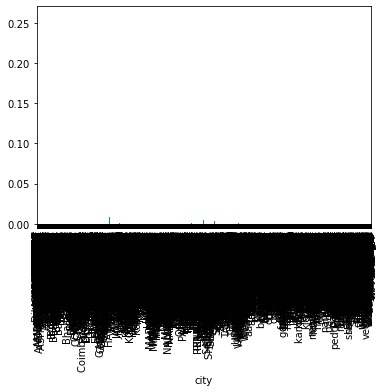

In [60]:
fq= df.groupby('city').size()/len(df)
y=df.loc[:, "{}_freq_encode".format('city')]=df['city'].map(fq)

df.drop(['city'],axis=1)
fq.plot.bar(stacked=True)
df.head(10)

In [61]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest,=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [62]:
model.fit(xtrain,ytrain)

LinearRegression()

In [71]:
y_pred=model.predict(xtest)
print(y_pred)

[0.0798625 0.0798625 0.0798625 ... 0.0798625 0.0798625 0.0798625]


In [64]:
model.predict(xtrain)

array([3.99544228e-03, 5.90551161e-05, 1.13474336e-02, ...,
       2.57713395e-01, 3.70061682e-02, 2.57713395e-01])

In [65]:
model.score(xtrain,ytrain)*100

89.65582982849224

In [66]:
model.score(xtest,ytest)*100

13.133678180837371

In [83]:
model.predict(xtest)
pred=np.mean(y_pred==ytest)
pred

0.0

#KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(xtrain,ytrain)


ValueError: Unknown label type: 'continuous'

In [67]:
from sklearn import metrics

In [73]:
confusion_matrix= metrics.confusion_matrix(ytest,y_pred)

ValueError: continuous is not supported

In [28]:
Accuracy=metrics.accuracy_score(ytrain,ytest)

ValueError: Found input variables with inconsistent numbers of samples: [786508, 196627]

In [33]:
Precision=metrics.precision_score(xtest,ytest)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [32]:
print(x,y)

  (0, 234325)	1.0
  (1, 530487)	1.0
  (2, 441992)	1.0
  (3, 210427)	1.0
  (4, 439318)	1.0
  (5, 135666)	1.0
  (6, 571403)	1.0
  (7, 241041)	1.0
  (8, 375394)	1.0
  (9, 139859)	1.0
  (10, 568660)	1.0
  (11, 522154)	1.0
  (12, 75766)	1.0
  (13, 536407)	1.0
  (14, 367603)	1.0
  (15, 510065)	1.0
  (16, 429276)	1.0
  (17, 335630)	1.0
  (18, 136268)	1.0
  (19, 382016)	1.0
  (20, 141354)	1.0
  (21, 571730)	1.0
  (22, 416163)	1.0
  (23, 112809)	1.0
  (24, 565362)	1.0
  :	:
  (983110, 82665)	1.0
  (983111, 213009)	1.0
  (983112, 556570)	1.0
  (983113, 488429)	1.0
  (983114, 21508)	1.0
  (983115, 457430)	1.0
  (983116, 548527)	1.0
  (983117, 33073)	1.0
  (983118, 487683)	1.0
  (983119, 269382)	1.0
  (983120, 541398)	1.0
  (983121, 19241)	1.0
  (983122, 38840)	1.0
  (983123, 175155)	1.0
  (983124, 118449)	1.0
  (983125, 556259)	1.0
  (983126, 175158)	1.0
  (983127, 1261)	1.0
  (983128, 34101)	1.0
  (983129, 259833)	1.0
  (983130, 395424)	1.0
  (983131, 396447)	1.0
  (983132, 455968)	1.0
  (983133